In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib as plt
import statistics as stat
import seaborn as sb





<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Première partie</h1>
</div>

### Des indicateurs de tendance centrale et de dispersion

In [16]:
data = pd.read_csv('final_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336713 non-null  int64  
 1   id_prod     336713 non-null  object 
 2   date        336713 non-null  object 
 3   session_id  336713 non-null  object 
 4   client_id   336713 non-null  object 
 5   price       336713 non-null  float64
 6   categ       336713 non-null  int64  
 7   sex         336713 non-null  object 
 8   birth       336713 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 23.1+ MB


#### Indicateurs de tendance centrale

In [17]:
#Pour avoir la même format que la colonne "birth"
year=data.date.apply(lambda x: int(x[:4]))

In [18]:
#Ajuter une colonne "sale year" utilisant data "year"
data.insert(9, "sale_year", np.array(year))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336713 non-null  int64  
 1   id_prod     336713 non-null  object 
 2   date        336713 non-null  object 
 3   session_id  336713 non-null  object 
 4   client_id   336713 non-null  object 
 5   price       336713 non-null  float64
 6   categ       336713 non-null  int64  
 7   sex         336713 non-null  object 
 8   birth       336713 non-null  int64  
 9   sale_year   336713 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.7+ MB


In [20]:
#Calculer l'âge du clients avec les colonnes associés
data = data.assign(Age = lambda x: (x["sale_year"] - x["birth"]))
data.head()


,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,sale_year,Age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,2021,44
1,1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0,f,1977,2021,44
2,2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0,f,1977,2021,44
3,3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0,f,1977,2021,44
4,4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0,f,1977,2021,44


#### La moyenne et la médiane

In [41]:
mean_price = stat.mean(data.price)
print("La moyenne de prix est:",mean_price)
mean_age = stat.mean(data.Age)
print("La moyenne d'âge du clients est:",mean_age)

La moyenne de prix est: 17.21518851366
La moyenne d'âge du clients est: 43.351260569089995


In [42]:
median_price = stat.median(data.price)
print("La médiane de prix est:",median_price)
median_age = stat.median(data.Age)
print("La médiane d'âge du clients est:",median_age)

La médiane de prix est: 13.9
La médiane d'âge du clients est: 42


#### La dispersion


In [53]:
vari_prix = stat.variance(data.price)
vari_age = stat.variance(data.Age)
ecar_prix = stat.stdev(data.price)
ecar_age = stat.stdev(data.Age)
print("La dipersion pour les colonnes de prix sont: ",vari_prix,"et",ecar_prix)
print("La dipersion pour les colonnes de l'âge sont: ",vari_age,"et",ecar_age)    

La dipersion pour les colonnes de prix sont:  318.816929634403 et 17.855445377654487
La dipersion pour les colonnes de l'âge sont:  183.13164071209653 et 13.532613964496901


<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 1px; ">Deuxième partie</h1>
</div>

### Des représentations graphiques 

#### Un histogramme

<AxesSubplot:xlabel='Age', ylabel='Count'>

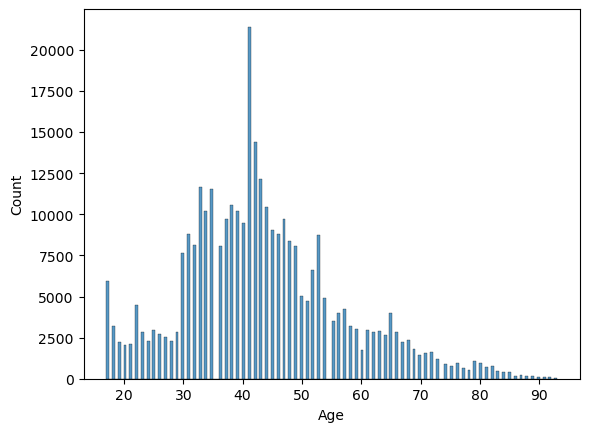

In [62]:
sb.histplot(data=data,x="Age")

#### Boîtes à moustaches

<AxesSubplot:>

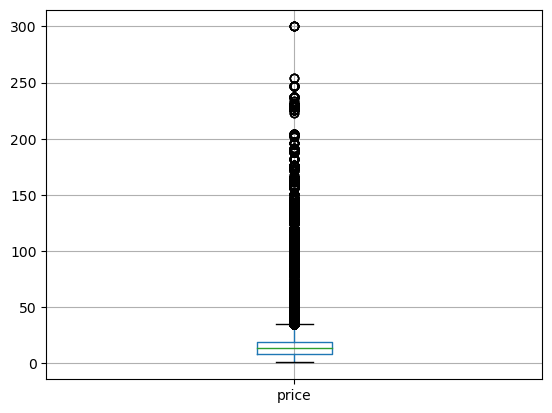

In [67]:
data[['price']].boxplot()

#### La représentation de série temporelle 
#### Un graphique dont l’axe des abscisses représente des dates

In [76]:
id_prod=data[data["id_prod"]=='0_1483']
id_prod


,Unnamed: 0,id_prod,date,session_id,client_id,price,categ,sex,birth,sale_year,Age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,2021,44
100,100,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0,m,1956,2021,65
150,150,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0,f,1984,2021,37
292,292,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0,m,1980,2021,41
293,293,0_1483,2021-05-30 10:39:02.236667,s_41614,c_1196,4.99,0,m,1980,2021,41
...,...,...,...,...,...,...,...,...,...,...,...
46482,46482,0_1483,2021-12-28 22:56:07.963150,s_141546,c_2376,4.99,0,m,1977,2021,44
46563,46563,0_1483,2021-05-31 21:05:14.295242,s_42271,c_7575,4.99,0,m,1973,2021,48
46594,46594,0_1483,2022-01-15 21:41:03.486784,s_150358,c_6007,4.99,0,f,1972,2022,50
46739,46739,0_1483,2021-08-02 00:12:19.600912,s_70167,c_2308,4.99,0,m,1984,2021,37


<AxesSubplot:xlabel='sale_year', ylabel='Count'>

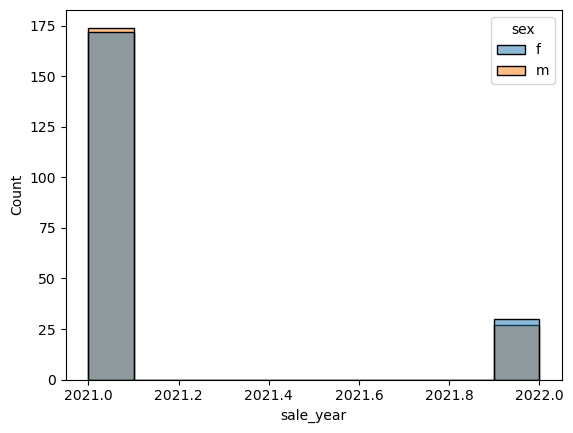

In [73]:
sb.histplot(data=id_prod, x='sale_year', hue='sex')